In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [189]:
data = pd.read_csv("C:\\Users\\HP\\ML Mock\\Datasets\\uber.csv")

In [190]:
data.dropna(inplace = True)

In [191]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [192]:
data.drop(["key"], axis = 1, inplace=True)


In [193]:
data.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [194]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])
data["pickup_year"] = data["pickup_datetime"].dt.year
data["pickup_time"] = data["pickup_datetime"].dt.hour


In [195]:
data["pickup_day"] = data["pickup_datetime"].dt.dayofweek

In [196]:
data.drop(["pickup_datetime"], axis = 1, inplace=True)

In [197]:
data.head(20)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_time,pickup_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,17,3
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5
6,24.5,-73.961447,40.693965,-73.871195,40.774297,5,2014,7,6
7,2.5,0.000000,0.000000,0.000000,0.000000,1,2012,13,1
8,9.7,-73.975187,40.745767,-74.002720,40.743537,1,2012,9,4
9,12.5,-74.001065,40.741787,-73.963040,40.775012,1,2012,19,3


In [198]:
data_with_outlier=data[(data[['pickup_longitude','dropoff_longitude']]<-180) | (data[['pickup_longitude','dropoff_longitude']]>180)].any(axis=1)
data = data[~data_with_outlier]
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_time,pickup_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,17,3


In [199]:
data_with_outlier1=data[(data[['pickup_latitude','dropoff_latitude']]<-90) | (data[['pickup_latitude','dropoff_latitude']]>90)].any(axis=1)
data = data[~data_with_outlier1]
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_time,pickup_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,17,3


In [200]:
data[(data['dropoff_latitude']<-90) | (data['dropoff_latitude']>90)].head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_time,pickup_day


In [201]:
data[(data['dropoff_latitude']<-90) | (data['dropoff_latitude']>90)].head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_time,pickup_day


In [ ]:
!pip install geopy

In [202]:
import pandas as pd
from geopy.distance import geodesic

# Assuming `df` is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and modify with your actual file

def calculate_distance(row):
    # Create tuples of the coordinates
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    
    # Calculate the distance using geopy
    distance = geodesic(pickup_coords, dropoff_coords).kilometers
    return distance

# Apply the function to each row in the DataFrame
data['distance_travled'] = data.apply(calculate_distance, axis=1)


In [203]:
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_time,pickup_day,distance_travled
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,19,3,1.681111
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,20,4,2.454363
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,21,0,5.039603
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,8,4,1.661442
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,17,3,4.483730


In [ ]:
#removing outliers

In [ ]:
# correlation_matrix = data.corr()

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()

In [ ]:
# Q1 = data['fare_amount'].quantile(0.25)
# Q3 = data['fare_amount'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data = data[(data['fare_amount'] >= lower_bound) & (data['fare_amount'] <= upper_bound)]

# print(data)

In [204]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


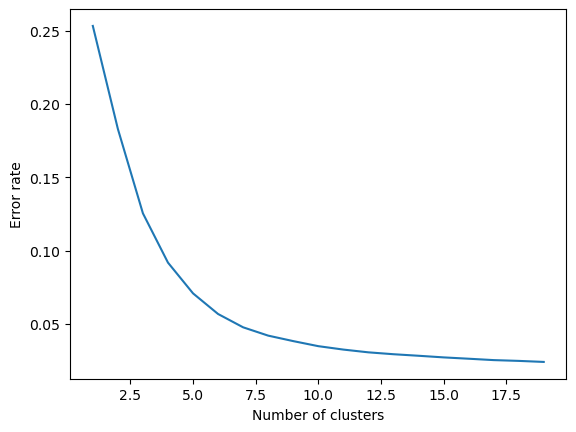

In [209]:
number_of_clusters = list(range(1, 20))

# Calculate the error rate for each value of the number of clusters.
error_rates = []
for number_of_cluster in number_of_clusters:
    print(number_of_cluster)
    lof = LocalOutlierFactor(n_neighbors=number_of_cluster)
    distance_travled = data[["distance_travled","fare_amount","pickup_time","passenger_count"]]
    lof_scores = lof.fit_predict(distance_travled)
    error_rate = (lof_scores == -1).mean()  # Calculate the proportion of outliers (-1)
    error_rates.append(error_rate)


# Plot the error rate as a function of the number of clusters.
plt.plot(number_of_clusters, error_rates)
plt.xlabel("Number of clusters")
plt.ylabel("Error rate")
plt.show()

In [210]:
lof = LocalOutlierFactor(n_neighbors=6)
distance_travled = data[["distance_travled","fare_amount"]]
lof_scores = lof.fit_predict(distance_travled)
outliers = np.where(lof_scores==-1)[0]
filtered_data = data[lof_scores != -1]
print(outliers)
distance_travled = filtered_data[["passenger_count","fare_amount"]]
lof_scores = lof.fit_predict(distance_travled)
outliers = np.where(lof_scores==-1)[0]
filtered_data = filtered_data[lof_scores != -1]
print(outliers)
print(len(filtered_data))

[   107    164    276 ... 199920 199940 199981]
[   414    589    618 ... 191349 191413 191477]
190045


In [211]:
from sklearn.ensemble import IsolationForest

In [212]:
outliers_detection = data[["distance_travled","fare_amount","pickup_time","passenger_count"]]
isolation_forest = IsolationForest(contamination=0.05)  
outlier_scores = []
outlier_scores = isolation_forest.fit_predict(outliers_detection)
filtered_data2 = data[outlier_scores == 1]
filtered_data2
len(filtered_data2)

189987

In [ ]:
sns.scatterplot(x=filtered_data2["distance_travled"], y = filtered_data2["fare_amount"])
plt.show

In [ ]:
sns.lineplot(x=filtered_data["distance_travled"], y = filtered_data["fare_amount"])
plt.show

In [ ]:
sns.scatterplot(x=filtered_data2["passenger_count"], y = filtered_data2["fare_amount"])
plt.show

In [ ]:
sns.lineplot(x=data["pickup_time"], y = data["fare_amount"])
plt.show

In [ ]:
sns.lineplot(x=data["pickup_date"], y = data["fare_amount"])
plt.show

In [ ]:
sns.lineplot(x=df["passenger_count"], y = df["fare_amount"])
plt.show

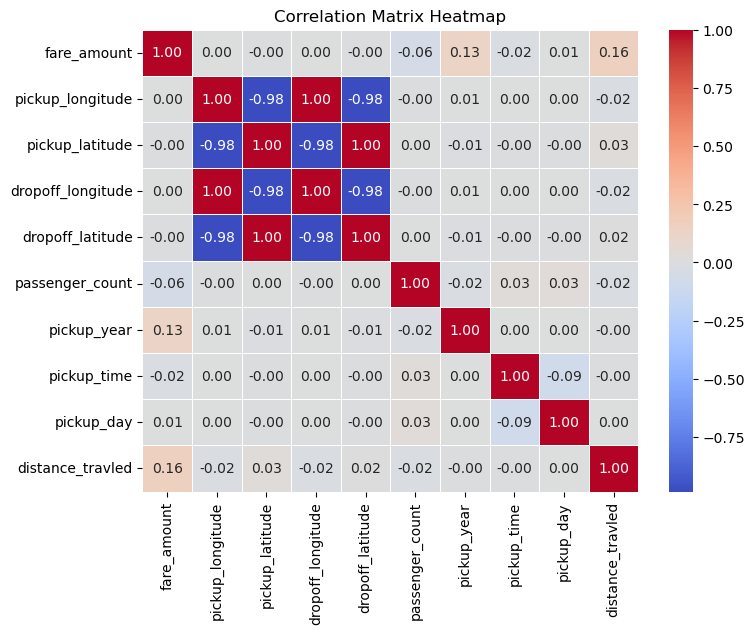

In [213]:
correlation_matrix = filtered_data2.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [214]:
filtered_data2.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_time', 'pickup_day', 'distance_travled'],
      dtype='object')

In [216]:
filtered_data2 = filtered_data2.drop(['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'],axis=1)

In [218]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(filtered_data2)
filtered_data = min_max_scaler.transform(filtered_data2)
filtered_data = pd.DataFrame(filtered_data2, index = filtered_data2.index, columns=filtered_data2.columns)
filtered_data.describe().round(2)

,fare_amount,passenger_count,pickup_year,pickup_time,pickup_day,distance_travled
count,189987.00,189987.00,189987.00,189987.00,189987.00,189987.00
mean,9.95,1.61,2011.72,13.54,3.04,2.85
std,6.16,1.21,1.86,6.46,1.94,12.00
min,-52.00,0.00,2009.00,0.00,0.00,0.00
25%,6.00,1.00,2010.00,9.00,1.00,1.19
50%,8.10,1.00,2012.00,14.00,3.00,2.04
75%,12.00,2.00,2013.00,19.00,5.00,3.55
max,50.33,6.00,2015.00,23.00,6.00,4512.41


In [219]:
X = filtered_data2[['passenger_count','pickup_year', 'pickup_time', 'pickup_day', 'distance_travled']]
X

,passenger_count,pickup_year,pickup_time,pickup_day,distance_travled
0,1,2015,19,3,1.681111
1,1,2009,20,4,2.454363
2,1,2009,21,0,5.039603
3,3,2009,8,4,1.661442
4,5,2014,17,3,4.483730
...,...,...,...,...,...
199994,1,2014,14,4,1.123897
199995,1,2012,10,6,0.112128
199996,1,2014,1,4,1.879635
199998,1,2015,14,2,3.536552


In [220]:
y = filtered_data2["fare_amount"]

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

In [226]:
y_pred_linear = linear_reg_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("Linear Regression - R2 Score:", r2_linear)
print("Linear Regression - RMSE:", rmse_linear)

Linear Regression - R2 Score: 0.05293141989553052
Linear Regression - RMSE: 5.977516568418491


In [227]:
y_pred_rf = random_forest_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression - R2 Score:", r2_rf)
print("Random Forest Regression - RMSE:", rmse_rf)


Random Forest Regression - R2 Score: 0.720848072762334
Random Forest Regression - RMSE: 3.245266670164152
